<a href="https://colab.research.google.com/github/pinnouse/zeroshot-unsupervised-mt/blob/main/test_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
!pip install apache_beam mwparserfromhell
!pip install transformers
!pip install datasets
# !pip install ftfy regex tqdm
# !pip install git+https://github.com/openai/CLIP.git

# multilingual CLIP pretrained
# https://github.com/FreddeFrallan/Multilingual-CLIP
# !pip install multilingual-clip
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 90.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 98.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.5/515.5 kB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for crcmod: filename=crcmod-1.7-cp39-cp39-linux_x86_64.whl size=36912 sha256=ba581a722902840f9d17a80cf08f28f0c16c1be78

In [ ]:
import os
import sys

repo = 'zeroshot-unsupervised-mt'
if os.path.isdir('zeroshot-unsupervised-mt'):
  !rm -rf {repo}

!git clone https://github.com/pinnouse/zeroshot-unsupervised-mt.git

if not repo in sys.path:
  sys.path.insert(1, repo)
print(sys.path)

Cloning into 'zeroshot-unsupervised-mt'...
remote: Enumerating objects: 282, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 282 (delta 99), reused 128 (delta 80), pack-reused 129
Receiving objects: 100% (282/282), 295.34 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (174/174), done.
['/content', 'zeroshot-unsupervised-mt', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
%cd /content/zeroshot-unsupervised-mt/
!git pull
%cd /content
%pwd

/content/zeroshot-unsupervised-mt
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), 276 bytes | 276.00 KiB/s, done.
From https://github.com/pinnouse/zeroshot-unsupervised-mt
   fc7fb15..ab8278f  main       -> origin/main
Updating fc7fb15..ab8278f
Fast-forward
 data_loader.py | 5 +----
 1 file changed, 1 insertion(+), 4 deletions(-)
/content


'/content'

In [ ]:
from datasets import load_dataset
from data_loader import data_loader
# dataset_en = load_dataset('wikipedia', '20220301.simple')
en_train, en_valid, en_test = data_loader('en')
# en_train, en_valid, en_test = data_loader.dataset_splitter(dataset_en)

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

with open('/content/gdrive/My Drive/CSC413/en_reparsed.pickle', 'wb') as f:
    pickle.dump({
        'train': en_train,
        'validation': en_valid,
        'test': en_test
    }, f, protocol=pickle.HIGHEST_PROTOCOL)

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.download('filename.pickle') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
from google.colab import drive
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/CSC413/final/en_reparsed.pickle', 'rb') as f:
  ds_en = pickle.load(f)
print(ds_en.keys())

Mounted at /content/gdrive
dict_keys(['train', 'validation', 'test'])


In [ ]:
l = {'train':[], 'validation':[], 'test':[]}
for split in ['train', 'validation', 'test']:
  for t in ds_en[split]['tokens']:
    l[split].append(t.numpy())
  ds_en[split]['tokens'] = l[split]

In [ ]:
with open('/content/gdrive/My Drive/CSC413/final/en.pickle', 'wb') as f:
    pickle.dump(ds_en, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from datetime import datetime
import numpy as np
import torch
from torch import nn
from transformers.optimization import Adafactor
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from transformers import BertTokenizer
from models import Transformer, Decoder

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
sentence_transformer = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
transformer = Transformer(tokenizer.vocab_size, nlayers=3, d_hid=512, dropout=0.1)
decoder = Decoder(tokenizer.vocab_size, nlayers=3)

transformer.to(device)
decoder.to(device)
sentence_transformer.to(device)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

In [ ]:
# sentences = []
# embeddings = []
# tokens = []
# for page in en_train['text']:
#   ss = page.replace('\n','').split('. ')
#   tokenized = tokenizer(ss, padding='max_length', max_length=64, return_tensors='pt').input_ids[0]
#   sentences.extend(ss)
#   tokens.extend(tokenized)
#   for t in tokenized:
#     parts = []
#     for i in range(len(t)-1):
#       parts.append(tokenizer.decode(t[:i+1], skip_special_tokens=True))
#     embeddings.append(SentenceTransformer())
#   if len(sentences) > 10000:
#     print(f'reached size: {len(sentences)}')
#     break

Epoch 1:
	iter 0/292, covered: 0


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 301.037709s
Epoch 2:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 299.630345s
Epoch 3:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 299.840281s
Epoch 4:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 300.186995s
Epoch 5:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 300.325084s
Epoch 6:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 300.433885s
Epoch 7:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 299.796715s
Epoch 8:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 298.901554s
Epoch 9:
	iter 0/292, covered: 0
	iter 100/292, covered: 2400
	iter 200/292, covered: 4800
	took 298.919068s
Epoch 10:
	iter 0/292, covered: 0
	iter 100/292, cov

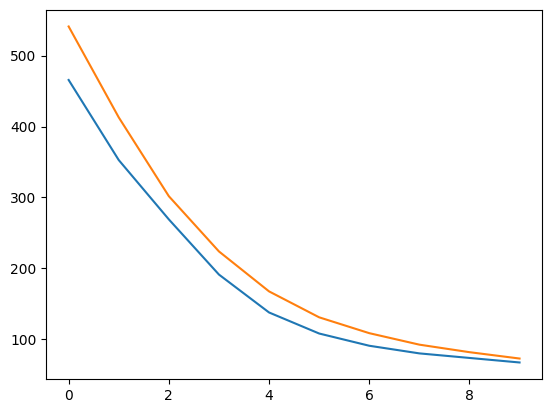

In [ ]:
import gc

gc.collect()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
context_length = 64

def train(decoder, transformer, train_data, epochs=10, bs=256):
  x_clips = torch.tensor(np.array(train_data['clips']), device=device)
  x_tokens = torch.tensor(np.array(train_data['tokens']), device=device)
  num_iters = len(x_tokens) // bs

  criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)

  d_optim = Adafactor(decoder.parameters())
  t_optim = Adafactor(transformer.parameters())

  d_losses = []
  t_losses = []
  for e in range(epochs):
    print(f'Epoch {e+1}:')
    indices = np.random.permutation(len(x_tokens))
    start_time = datetime.now()

    d_epoch_loss = 0
    t_epoch_loss = 0

    for i in range(num_iters):
      # print(train_data[0])
      # x_train = train_data[indices[i*bs:(i+1)*bs]]
      if i % 100 == 0:
        print(f'\titer {i}/{num_iters}, covered: {i*bs}')
      clips = x_clips[indices[i*bs:(i+1)*bs]]
      tokens = x_tokens[indices[i*bs:(i+1)*bs]]

      # ==============================
      # == learn decoder
      # ==============================
      tgt_in = tokens[:, :-1]
      tgt_expect = tokens[:, 1:]
      d_mask = nn.Transformer.generate_square_subsequent_mask(context_length - 1, device=device)
      d_output = decoder(clips, tgt_in, tgt_mask=d_mask)
      d_output = d_output.permute(0,2,1)
      d_loss = criterion(d_output, tgt_expect)
      d_epoch_loss += d_loss.item()

      d_optim.zero_grad()
      d_loss.backward()
      d_optim.step()

      # ==============================
      # == self learn monolingual
      # ==============================
      # "other" generator self supervised
      # https://jamesmccaffrey.wordpress.com/2022/09/09/simplest-transformer-seq-to-seq-example/
      
      src = tokens
      tgt = src
      tgt_in = tgt[:,:-1]
      tgt_expect = tgt[:,1:]
      t_mask = nn.Transformer.generate_square_subsequent_mask(context_length - 1, device=device)
      # https://pytorch.org/tutorials/beginner/translation_transformer.html#seq2seq-network-using-transformer
      tgt_attn_mask = (tgt_in == tokenizer.pad_token_id)
      attn_mask = (src == tokenizer.pad_token_id)

      output, other_embeddings = transformer(src, tgt_in, tgt_mask=t_mask, tp_mask=tgt_attn_mask, sp_mask=attn_mask) # [bs,seq,vocab]

      # get preds shape to conform to tgt_expect
      output = output.permute(0,2,1)  # now [bs, vocab, seq]

      t_loss = criterion(output, tgt_expect)
      t_epoch_loss += t_loss.item()

      t_optim.zero_grad()
      t_loss.backward()
      t_optim.step()
    
    print(f'\ttook {(datetime.now() - start_time).total_seconds()}s')
    d_losses.append(d_epoch_loss / num_iters)
    t_losses.append(t_epoch_loss / num_iters)

  plt.plot(d_losses, label='decoder')
  plt.plot(t_losses, label='transformer')
  plt.show()
  return d_losses, t_losses

decoder_losses, transformer_losses = train(decoder, transformer, ds_en['train'], 10, bs=24)
# print(en_train['text'])

In [ ]:
import gc

gc.collect()

device = 'cuda' if torch.cuda.is_available() else 'cpu'
context_length = 64

from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
model = BertModel.from_pretrained("bert-base-cased")
# text = "Replace me by any text you'd like."
# encoded_input = tokenizer(text, return_tensors='pt')
# output = model(**encoded_input)

def train_decoder(decoder, bert_embs, epochs=10, bs=256):
  x_clips = torch.tensor(np.array(train_data['clips']), device=device)
  x_tokens = torch.tensor(np.array(train_data['tokens']), device=device)
  num_iters = len(x_tokens) // bs

  criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)

  d_optim = Adafactor(decoder.parameters())
  t_optim = Adafactor(transformer.parameters())

  d_losses = []
  t_losses = []
  for e in range(epochs):
    print(f'Epoch {e+1}:')
    indices = np.random.permutation(len(x_tokens))
    start_time = datetime.now()

    d_epoch_loss = 0
    t_epoch_loss = 0

    for i in range(num_iters):
      # print(train_data[0])
      # x_train = train_data[indices[i*bs:(i+1)*bs]]
      if i % 100 == 0:
        print(f'\titer {i}/{num_iters}, covered: {i*bs}')
      clips = x_clips[indices[i*bs:(i+1)*bs]]
      tokens = x_tokens[indices[i*bs:(i+1)*bs]]

      # ==============================
      # == learn decoder
      # ==============================
      tgt_in = tokens[:, :-1]
      tgt_expect = tokens[:, 1:]
      d_mask = nn.Transformer.generate_square_subsequent_mask(context_length - 1, device=device)
      d_output = decoder(clips, tgt_in, tgt_mask=d_mask)
      d_output = d_output.permute(0,2,1)
      d_loss = criterion(d_output, tgt_expect)
      d_epoch_loss += d_loss.item()

      d_optim.zero_grad()
      d_loss.backward()
      d_optim.step()

      # ==============================
      # == self learn monolingual
      # ==============================
      # "other" generator self supervised
      # https://jamesmccaffrey.wordpress.com/2022/09/09/simplest-transformer-seq-to-seq-example/
      
      src = tokens
      tgt = src
      tgt_in = tgt[:,:-1]
      tgt_expect = tgt[:,1:]
      t_mask = nn.Transformer.generate_square_subsequent_mask(context_length - 1, device=device)
      # https://pytorch.org/tutorials/beginner/translation_transformer.html#seq2seq-network-using-transformer
      tgt_attn_mask = (tgt_in == tokenizer.pad_token_id)
      attn_mask = (src == tokenizer.pad_token_id)

      output, other_embeddings = transformer(src, tgt_in, tgt_mask=t_mask, tp_mask=tgt_attn_mask, sp_mask=attn_mask) # [bs,seq,vocab]

      # get preds shape to conform to tgt_expect
      output = output.permute(0,2,1)  # now [bs, vocab, seq]

      t_loss = criterion(output, tgt_expect)
      t_epoch_loss += t_loss.item()

      t_optim.zero_grad()
      t_loss.backward()
      t_optim.step()
    
    print(f'\ttook {(datetime.now() - start_time).total_seconds()}s')
    d_losses.append(d_epoch_loss / num_iters)
    t_losses.append(t_epoch_loss / num_iters)

  plt.plot(d_losses, label='decoder')
  plt.plot(t_losses, label='transformer')
  plt.show()
  return d_losses, t_losses

decoder_losses, transformer_losses = train(decoder, transformer, ds_en['train'], 20, bs=24)
# print(en_train['text'])

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


NameError: ignored

In [ ]:
for i in range(10):
  print(decoder_losses[i] - transformer_losses[i])

-75.52157640457153
-60.24032759666443
-32.74064779281616
-32.65501517057419
-29.768624156713486
-22.866421282291412
-17.773917496204376
-12.330685511231422
-8.143790252506733
-5.565091989934444


In [ ]:
# torch.save(decoder.state_dict(), '/content/gdrive/My Drive/CSC413/final/decoder2.ptmodel')
torch.save(transformer.state_dict(), '/content/gdrive/My Drive/CSC413/final/en_transformer2.ptmodel')

In [ ]:
checkpoint = torch.load('/content/gdrive/My Drive/CSC413/final/ckpt-Decoder-epoch-49.pt')
decoder.load_state_dict(checkpoint['state'])

<All keys matched successfully>

In [ ]:
# decoder.load_state_dict(torch.load('/content/gdrive/My Drive/CSC413/final/decoder2.ptmodel'))
transformer.load_state_dict(torch.load('/content/gdrive/My Drive/CSC413/final/en_transformer2.ptmodel'))

<All keys matched successfully>

In [ ]:
import time

def validate(decoder, transformer, tokenizer, sentence_transformer, valid_data, n = 1000):
  decoder.eval()
  transformer.eval()
  
  x_clips = torch.tensor(np.array(valid_data['clips'][:n]), device=device)
  x_tokens = torch.tensor(np.array(valid_data['tokens'][:n]), device=device)

  n = min(n, len(x_tokens))

  total = 0
  d_correct = 0
  t_correct = 0
  for i in range(n):
    clip = x_clips[i]
    tokens = x_tokens[i]

    for j in range(1, len(tokens)-1):
      token = tokens[j]
      if token == tokenizer.pad_token_id or token == tokenizer.eos_token_id:
        break
      mask = nn.Transformer.generate_square_subsequent_mask(j+1, device=device)
      sentence = tokens[:j+1].unsqueeze(0)
      # print(clip[:j].shape, sentence.unsqueeze(0).shape)
      # print(tokenizer.convert_ids_to_tokens(sentence))
      # time.sleep(1)
      dec_out = decoder(clip.unsqueeze(0), sentence, tgt_mask=mask)
      dec_l = dec_out[:,-1]
      tk = torch.argmax(dec_l)
      if tk == tokens[j+1]:
        # print('d', tokenizer.convert_ids_to_tokens(sentence))
        # print(tokenizer.convert_ids_to_tokens([tk.item(), tokens[j+1].item()]))
        d_correct += 1
      tr_out, _ = transformer(tokens.unsqueeze(0), sentence, tgt_mask=mask)
      tr_l = tr_out[:,-1]
      tr_tk = torch.argmax(tr_l)
      if tr_tk == tokens[j+1]:
        t_correct += 1
        # print('t', tokenizer.convert_ids_to_tokens(sentence))
        # print(tokenizer.convert_ids_to_tokens([tr_tk.item(), tokens[j+1].item()]))
      total += 1
  print(f'Results are:\n\tdecoder: {d_correct/total}\n\ttransformer: {t_correct/total}')

validate(decoder, transformer, tokenizer, sentence_transformer, ds_en['validation'])

Results are:
	decoder: 0.17662977818585995
	transformer: 0.16150389020441694


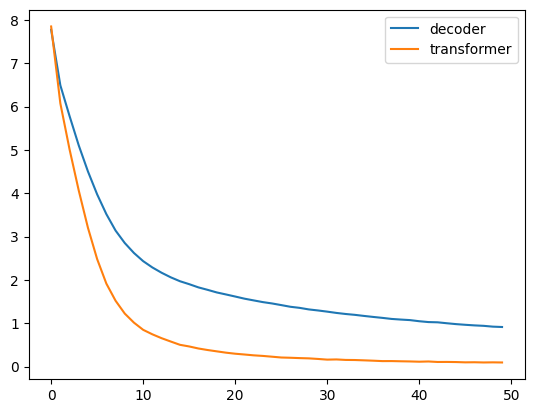

In [ ]:
l = []
for i in range(len(checkpoint['losses'])):
  l.append(checkpoint['losses'][i] / 109)
plt.plot(l, label='decoder')
plt.plot(transformer_losses, label='transformer')
plt.legend()
plt.show()

Epoch 1:
	iter 0/54, covered: 0


/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


	took 18.668395s
Epoch 2:
	iter 0/54, covered: 0
	took 18.640749s
Epoch 3:
	iter 0/54, covered: 0
	took 18.616128s
Epoch 4:
	iter 0/54, covered: 0
	took 18.650271s
Epoch 5:
	iter 0/54, covered: 0
	took 18.62112s
Epoch 6:
	iter 0/54, covered: 0
	took 18.631533s
Epoch 7:
	iter 0/54, covered: 0
	took 18.609044s
Epoch 8:
	iter 0/54, covered: 0
	took 18.620206s
Epoch 9:
	iter 0/54, covered: 0
	took 18.607779s
Epoch 10:
	iter 0/54, covered: 0
	took 18.610255s
Epoch 11:
	iter 0/54, covered: 0
	took 18.613727s
Epoch 12:
	iter 0/54, covered: 0
	took 18.601458s
Epoch 13:
	iter 0/54, covered: 0
	took 18.617996s
Epoch 14:
	iter 0/54, covered: 0
	took 18.615736s
Epoch 15:
	iter 0/54, covered: 0
	took 18.617786s
Epoch 16:
	iter 0/54, covered: 0
	took 18.632992s
Epoch 17:
	iter 0/54, covered: 0
	took 18.647103s
Epoch 18:
	iter 0/54, covered: 0
	took 18.598981s
Epoch 19:
	iter 0/54, covered: 0
	took 18.601624s
Epoch 20:
	iter 0/54, covered: 0
	took 18.620222s
Epoch 21:
	iter 0/54, covered: 0
	took 18.

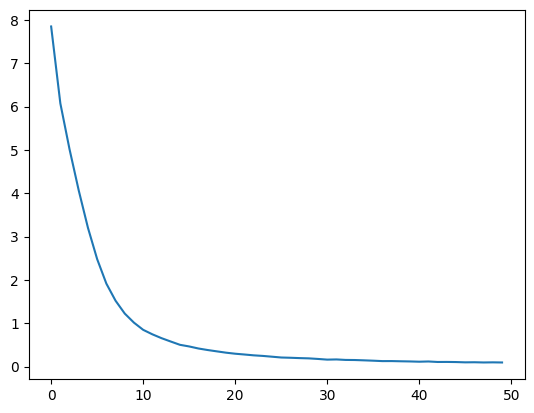

In [ ]:
context_length = 64
def train_transformer(transformer, train_data, epochs=10, bs=256):
  x_tokens = torch.tensor(np.array(train_data['tokens']), device=device)
  num_iters = len(x_tokens) // bs

  criterion = nn.CrossEntropyLoss(ignore_index=tokenizer.pad_token_id)

  t_optim = Adafactor(transformer.parameters())

  t_losses = []
  for e in range(epochs):
    print(f'Epoch {e+1}:')
    indices = np.random.permutation(len(x_tokens))
    start_time = datetime.now()

    t_epoch_loss = 0

    for i in range(num_iters):
      # print(train_data[0])
      # x_train = train_data[indices[i*bs:(i+1)*bs]]
      if i % 100 == 0:
        print(f'\titer {i}/{num_iters}, covered: {i*bs}')
      tokens = x_tokens[indices[i*bs:(i+1)*bs]]

      # ==============================
      # == self learn monolingual
      # ==============================
      # "other" generator self supervised
      # https://jamesmccaffrey.wordpress.com/2022/09/09/simplest-transformer-seq-to-seq-example/
      
      src = tokens
      tgt = src
      tgt_in = tgt[:,:-1]
      tgt_expect = tgt[:,1:]
      t_mask = nn.Transformer.generate_square_subsequent_mask(context_length - 1, device=device)
      # https://pytorch.org/tutorials/beginner/translation_transformer.html#seq2seq-network-using-transformer
      tgt_attn_mask = (tgt_in == tokenizer.pad_token_id)
      attn_mask = (src == tokenizer.pad_token_id)

      output, other_embeddings = transformer(src, tgt_in, tgt_mask=t_mask, tp_mask=tgt_attn_mask, sp_mask=attn_mask) # [bs,seq,vocab]

      # get preds shape to conform to tgt_expect
      output = output.permute(0,2,1)  # now [bs, vocab, seq]

      t_loss = criterion(output, tgt_expect)
      t_epoch_loss += t_loss.item()

      t_optim.zero_grad()
      t_loss.backward()
      t_optim.step()
    
    print(f'\ttook {(datetime.now() - start_time).total_seconds()}s')
    t_losses.append(t_epoch_loss / num_iters)

  plt.plot(t_losses, label='transformer')
  plt.show()

  return t_losses

transformer_losses = train_transformer(transformer, ds_en['train'], epochs=50, bs=128)